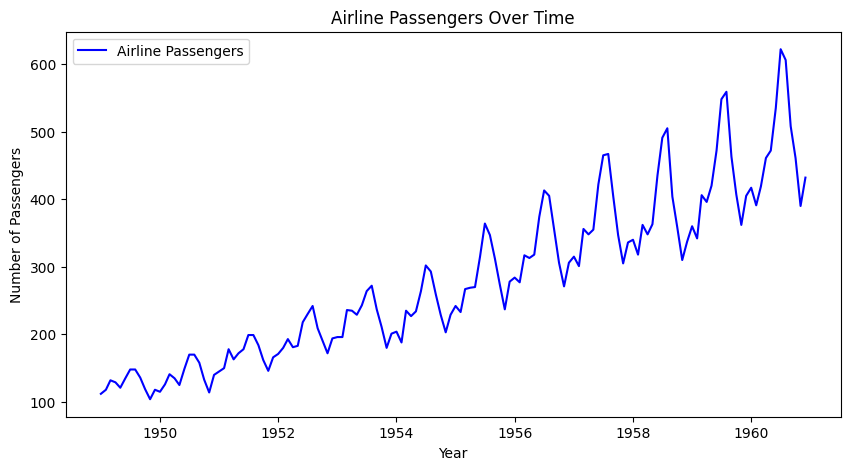

ADF Test on Original Data:
ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641
Critical Values:
   1%: -3.4816817173418295
   5%: -2.8840418343195267
   10%: -2.578770059171598
Conclusion: The series is non-stationary.


(np.float64(0.8153688792060498),
 np.float64(0.991880243437641),
 13,
 130,
 {'1%': np.float64(-3.4816817173418295),
  '5%': np.float64(-2.8840418343195267),
  '10%': np.float64(-2.578770059171598)},
 np.float64(996.692930839019))

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Load the dataset
file_path = "/content/ch3_airline_passengers.csv"
df = pd.read_csv(file_path)

# Convert 'Month' to datetime format and set it as the index
df["Month"] = pd.to_datetime(df["Month"])
df.set_index("Month", inplace=True)

# Define ADF test function
def adf_test(series):
    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"   {key}: {value}")
    if result[1] <= 0.05:
        print("Conclusion: The series is stationary.")
    else:
        print("Conclusion: The series is non-stationary.")
    return result

# Plot the time series data
plt.figure(figsize=(10, 5))
plt.plot(df["AirPassengers"], label="Airline Passengers", color="blue")
plt.title("Airline Passengers Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.legend()
plt.show()

# Perform ADF Test
print("ADF Test on Original Data:")
adf_test(df["AirPassengers"])
